**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.




```
# This is formatted as code
```

# **Name:** Muhammad Junaid
# **Roll Number:** 463800
# **Section:** B

# 🔹 Task 1: Load the Dataset

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

# Load Dataset (Update path if needed)
url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-02_/mill.csv"
df = pd.read_csv(url)


In [ ]:

# Display last 5 rows
df.tail(5)


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [ ]:

# Check data types
df.dtypes


,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [ ]:
# Removing irrelevant columns

df = df.drop(['Unnamed: 1'], axis=1)
df = df.drop(['S.no'], axis=1)

In [ ]:

# Check dataset shape
df.shape


(167, 13)

# 🔹 Task 2: Data Cleaning

In [ ]:

# Check missing values
print(df.isnull().sum())

case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           5
smcDC           1
vib_table       2
vib_spindle     4
AE_table        2
AE_spindle      1
dtype: int64


In [ ]:
# @title
# Fill missing values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

df_sensors =  df.drop(columns=['VB'])

num_cols = df_sensors.select_dtypes(include='number').columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_sensors[num_cols])

imputer = KNNImputer(
    n_neighbors=5,   # typical: 3–7
    weights='distance'
)

imputed_scaled = imputer.fit_transform(scaled_data)

imputed_data = scaler.inverse_transform(imputed_scaled)

df_imputed = df.copy()
df_imputed[num_cols] = imputed_data
print(df.isnull().sum())
print(df_imputed.isnull().sum())


case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           5
smcDC           1
vib_table       2
vib_spindle     4
AE_table        2
AE_spindle      1
dtype: int64
case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           0
smcDC           0
vib_table       0
vib_spindle     0
AE_table        0
AE_spindle      0
dtype: int64


In [ ]:
df_known = df_imputed[df_imputed['VB'].notna()]     # Rows with VB
df_missing = df_imputed[df_imputed['VB'].isna()]    # Rows without VB

X_train = df_known.drop(columns=['VB'])
y_train = df_known['VB']

X_pred = df_missing.drop(columns=['VB'])

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
vb_pred = rf.predict(X_pred)
df_imputed.loc[df_imputed['VB'].isna(), 'VB'] = vb_pred
print(df.isnull().sum())
print(df_imputed.isnull().sum())

case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           5
smcDC           1
vib_table       2
vib_spindle     4
AE_table        2
AE_spindle      1
dtype: int64
case           0
run            0
VB             0
time           0
DOC            0
feed           0
material       0
smcAC          0
smcDC          0
vib_table      0
vib_spindle    0
AE_table       0
AE_spindle     0
dtype: int64


### ✍️ Explain how you handled missing values here.
Sensor signal missing values were imputed using KNN imputation. It preserves the relationships between machining runs based on similarity across multiple process. After this, missing VB values were imputed using Random Forest regression because it can model the nonlinear relationship between tool wear and sensor data which gives accurate and physically meaningful estimate.

In [ ]:

# Check duplicates
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

duplicate_rows_df_imputed = df_imputed[df_imputed.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_imputed.shape)

number of duplicate rows:  (0, 13)
number of duplicate rows:  (0, 13)


In [ ]:

# Remove duplicates

df_imputed = df_imputed.drop_duplicates()
df = df.drop_duplicates()


# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [ ]:
cols = df_imputed.columns[0:13]

for col in cols:
    print(f"\nColumn: {col}")
    mean_val = df_imputed[col].mean()
    median_val = df_imputed[col].median()
    mode_val = df_imputed[col].mode()
    print(f"  Mean   : {mean_val}")
    print(f"  Median : {median_val}")
    print(f"  Mode : {mode_val}")


Column: case
  Mean   : 8.32934131736527
  Median : 10.0
  Mode : 0    11.0
Name: case, dtype: float64

Column: run
  Mean   : 7.167664670658683
  Median : 6.0
  Mode : 0    1.0
Name: run, dtype: float64

Column: VB
  Mean   : 0.320429024496794
  Median : 0.2685732479557479
  Mode : 0    0.0
Name: VB, dtype: float64

Column: time
  Mean   : 26.11377245508982
  Median : 19.0
  Mode : 0    3.0
Name: time, dtype: float64

Column: DOC
  Mean   : 1.032934131736527
  Median : 0.75
  Mode : 0    0.75
Name: DOC, dtype: float64

Column: feed
  Mean   : 0.3727544910179641
  Median : 0.25
  Mode : 0    0.25
Name: feed, dtype: float64

Column: material
  Mean   : 1.347305389221557
  Median : 1.0
  Mode : 0    1.0
Name: material, dtype: float64

Column: smcAC
  Mean   : -0.1669894160666758
  Median : -0.183105469
  Mode : 0    0.249023
Name: smcAC, dtype: float64

Column: smcDC
  Mean   : 1.336330254078776
  Median : 1.372070313
  Mode : 0    1.381836
Name: smcDC, dtype: float64

Column: vib_table

### ✍️ Is tool wear normally distributed? Is mean close to median?

Tool wear is not normally distrubted as mean. mode and median have different values. Mean is close to median.


## 2️⃣ Spread (Variation)

In [ ]:
# Variance
for col in cols:
    print(f"\nColumn: {col}")

    variance = df_imputed[col].var()   # sample variance (default)

    print(f"  Variance : {variance}")


Column: case
  Variance : 22.70413390087294

Column: run
  Variance : 24.694610778443113

Column: VB
  Variance : 0.06426930878258381

Column: time
  Variance : 542.5472188153815

Column: DOC
  Variance : 0.13294495346656074

Column: feed
  Variance : 0.01571405382007074

Column: material
  Variance : 0.22804992424788906

Column: smcAC
  Variance : 0.12371432510887902

Column: smcDC
  Variance : 0.03585382793133822

Column: vib_table
  Variance : 0.001335670698188157

Column: vib_spindle
  Variance : 0.0004515644741226413

Column: AE_table
  Variance : 0.0006147073335028661

Column: AE_spindle
  Variance : 0.0004490316377648808


In [ ]:
# Range
for col in cols:
    print(f"\nColumn: {col}")

    col_max = df_imputed[col].max()
    col_min = df_imputed[col].min()
    col_range = col_max - col_min

    print(f"  Range    : {col_range}")


Column: case
  Range    : 15.0

Column: run
  Range    : 21.999999999999996

Column: VB
  Range    : 1.53

Column: time
  Range    : 105.0

Column: DOC
  Range    : 0.75

Column: feed
  Range    : 0.25

Column: material
  Range    : 1.0

Column: smcAC
  Range    : 1.176757813

Column: smcDC
  Range    : 1.450195313

Column: vib_table
  Range    : 0.2929687394532259

Column: vib_spindle
  Range    : 0.18432617199999998

Column: AE_table
  Range    : 0.14953613295925372

Column: AE_spindle
  Range    : 0.18127171374456386


In [ ]:
# IQR
for col in cols:
    print(f"\nColumn: {col}")

    q1 = df_imputed[col].quantile(0.25)
    q3 = df_imputed[col].quantile(0.75)
    iqr = q3 - q1

    print(f"  IQR      : {iqr}")


Column: case
  IQR      : 9.0

Column: run
  IQR      : 7.0

Column: VB
  IQR      : 0.305

Column: time
  IQR      : 31.5

Column: DOC
  IQR      : 0.75

Column: feed
  IQR      : 0.25

Column: material
  IQR      : 1.0

Column: smcAC
  IQR      : 0.747070313

Column: smcDC
  IQR      : 0.042400368422192525

Column: vib_table
  IQR      : 0.021972657

Column: vib_spindle
  IQR      : 0.023193359999999996

Column: AE_table
  IQR      : 0.021972656000000007

Column: AE_spindle
  IQR      : 0.02593994099999998


### ✍️ Which sensor shows highest variability?

Spindle AC current ammeter shows highest variability

### ✍️ Does vibration vary for than current?

Vibration varies more than DC current but less than AC current

## 3️⃣ Shape (Distribution)

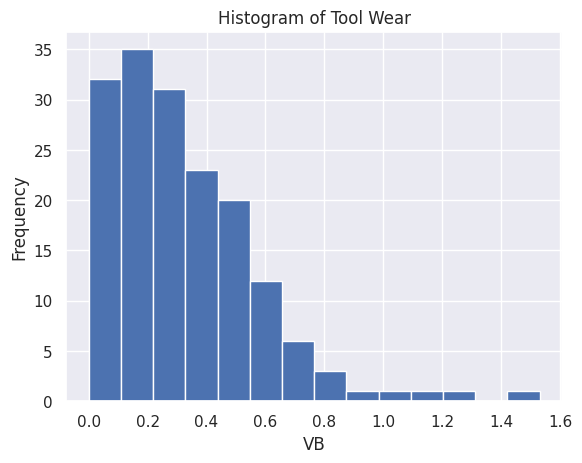

In [ ]:
# Histogram of Tool Wear

plt.hist(df_imputed['VB'], bins='auto')
plt.xlabel('VB')
plt.ylabel('Frequency')
plt.title('Histogram of Tool Wear')
plt.show()


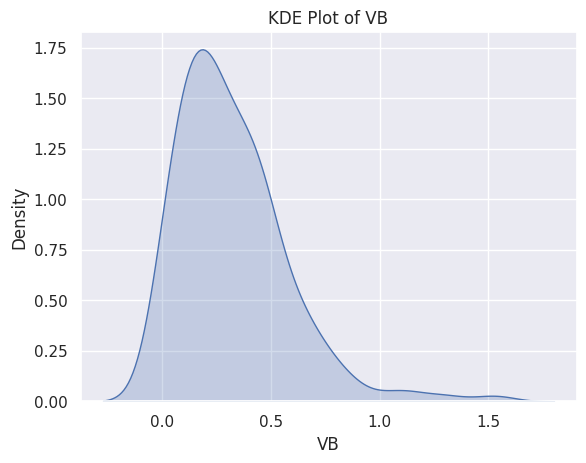

In [ ]:
# KDE Plot
sns.kdeplot(df_imputed['VB'].dropna(), fill=True)
plt.xlabel('VB')
plt.ylabel('Density')
plt.title('KDE Plot of VB')
plt.show()


### ✍️ Is distribution symmetric, skewed, or multi-modal?
It's not symmetric. It is (right) skewed

## 4️⃣ Outlier Detection

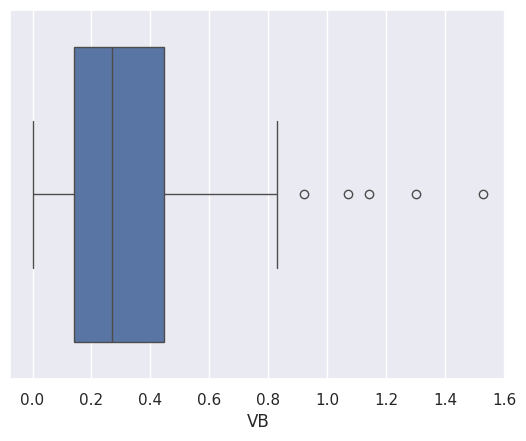

In [ ]:
# Boxplot, IQR, Z-modified score
sns.boxplot(x=df_imputed['VB'])

def modified_z_score(x):
    median = np.median(x)
    mad = np.median(np.abs(x - median))
    return 0.6745 * (x - median) / mad


<Axes: xlabel='smcAC'>

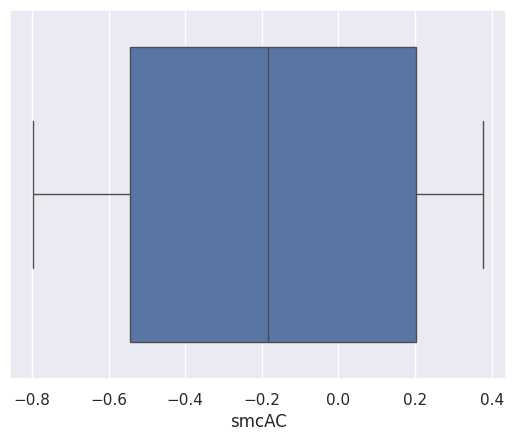

In [ ]:
sns.boxplot(x=df_imputed['smcAC'])



<Axes: xlabel='smcDC'>

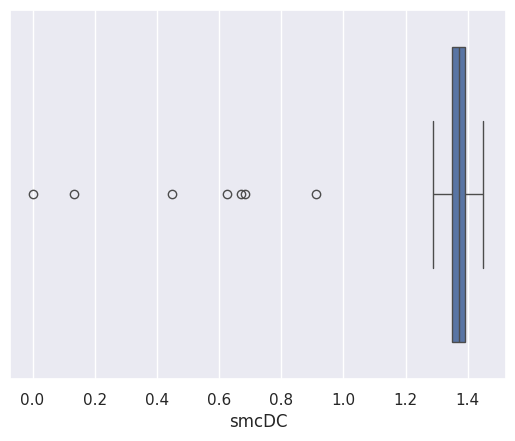

In [ ]:
sns.boxplot(x=df_imputed['smcDC'])

<Axes: xlabel='smcDC'>

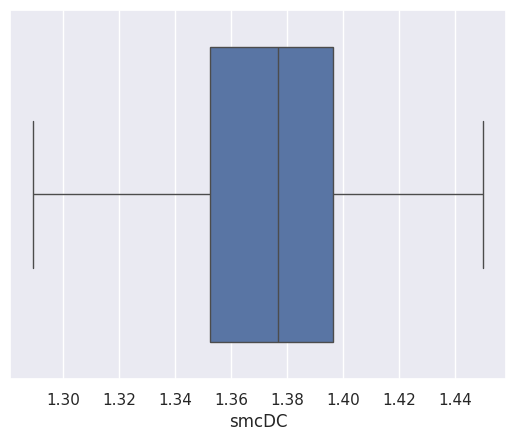

In [ ]:
z = modified_z_score(df_imputed['smcDC'])
outliers = np.abs(z) > 3.5
df_clean = df_imputed.loc[~outliers].reset_index(drop=True)

sns.boxplot(x=df_clean['smcDC'])

<Axes: xlabel='vib_table'>

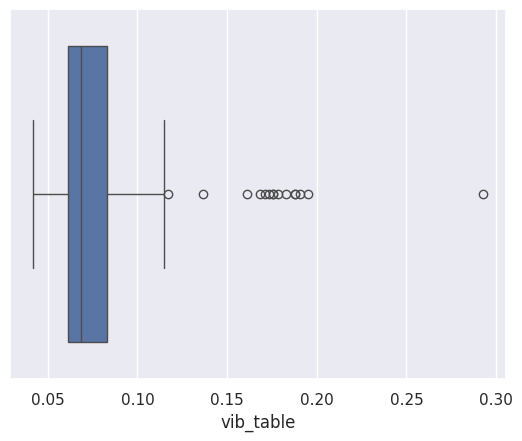

In [ ]:
sns.boxplot(x=df_imputed['vib_table'])

<Axes: xlabel='vib_table'>

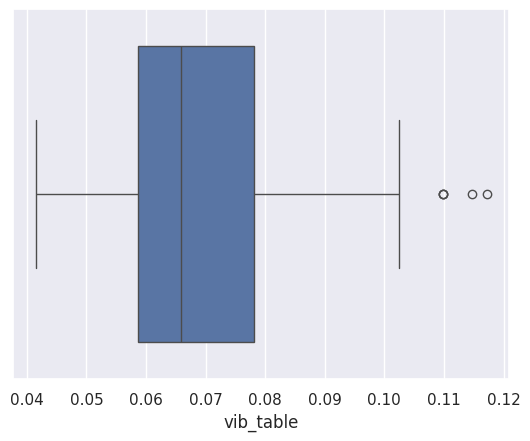

In [ ]:
z = modified_z_score(df_clean['vib_table'])
outliers = np.abs(z) > 3.5
df_clean = df_clean.loc[~outliers].reset_index(drop=True)

sns.boxplot(x=df_clean['vib_table'])

<Axes: xlabel='vib_spindle'>

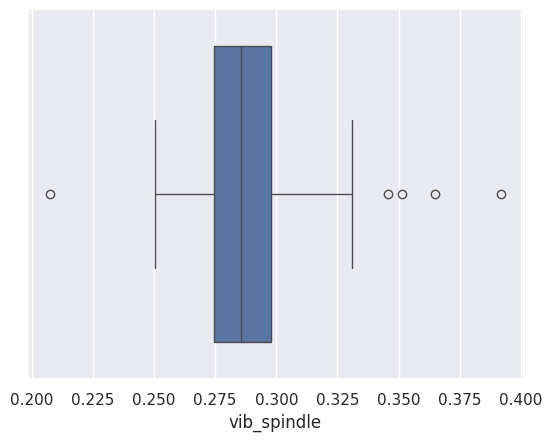

In [ ]:
sns.boxplot(x=df_imputed['vib_spindle'])

<Axes: xlabel='vib_spindle'>

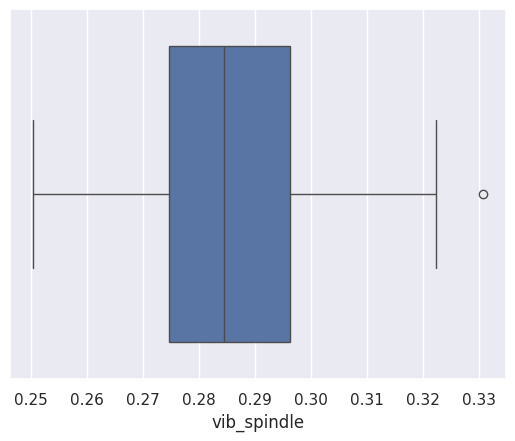

In [ ]:
z = modified_z_score(df_clean['vib_spindle'])
outliers = np.abs(z) > 3.5
df_clean = df_clean.loc[~outliers].reset_index(drop=True)

sns.boxplot(x=df_clean['vib_spindle'])

<Axes: xlabel='AE_table'>

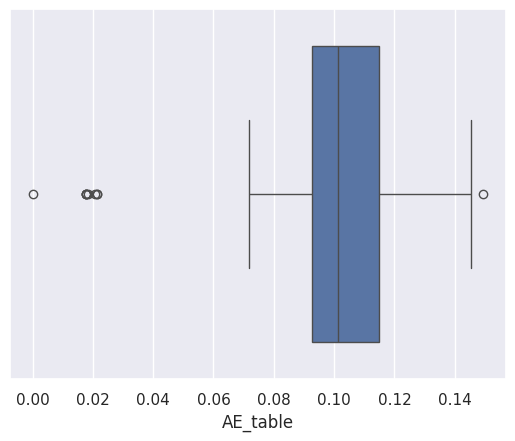

In [ ]:
sns.boxplot(x=df_imputed['AE_table'])

<Axes: xlabel='AE_table'>

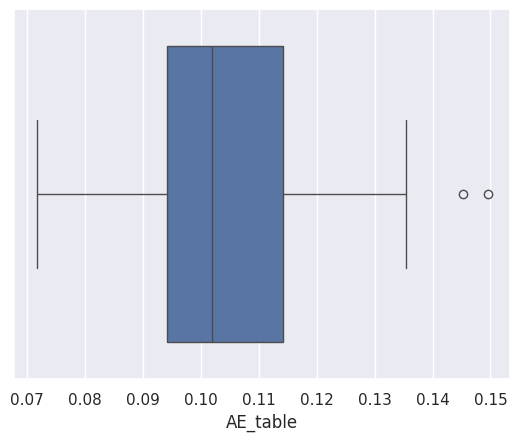

In [ ]:
z = modified_z_score(df_clean['AE_table'])
outliers = np.abs(z) > 3.5
df_clean = df_clean.loc[~outliers].reset_index(drop=True)

sns.boxplot(x=df_clean['AE_table'])

<Axes: xlabel='AE_spindle'>

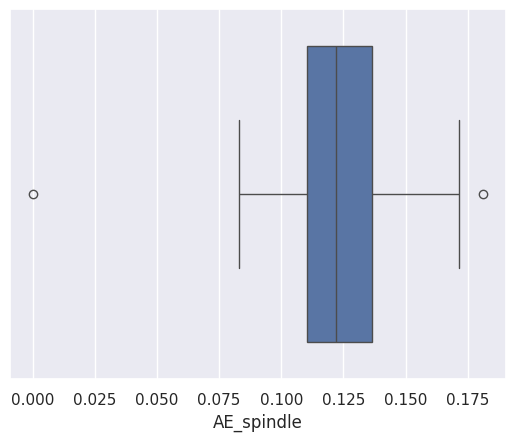

In [ ]:
sns.boxplot(x=df_imputed['AE_spindle'])

<Axes: xlabel='AE_spindle'>

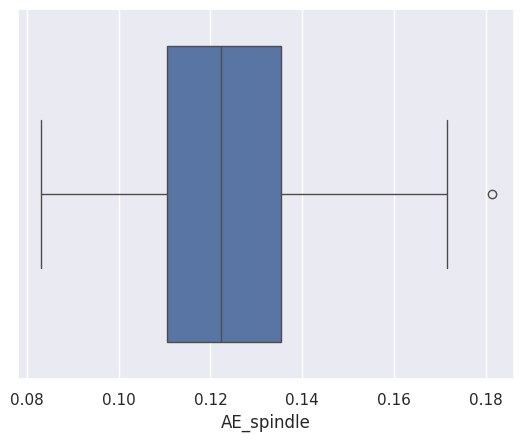

In [ ]:
z = modified_z_score(df_clean['AE_spindle'])
outliers = np.abs(z) > 3.5
df_clean = df_clean.loc[~outliers].reset_index(drop=True)

sns.boxplot(x=df_clean['AE_spindle'])

Outliers were removed for: smcdc, vib_table, vib_spindle, ae_table, ae_spindle. VB wasn't removed due to extreme values having relevance in industrial analysis. smcAC has no outliers.

In [ ]:
#df_imputed.shape
df_clean.shape

(134, 13)


### ✍️
- Which method did you use (IQR or Modified Z-score)? Modified Z-score
- Why? As data is heavily skewed and IQR is weak against skewed data so we use Modified X-score. Z-score also preserves industrial extremes and handles tailed signals well.
- Which parameters contain significant outliers? DC spindle motor current, table vibration and Acoustic Emission of table
- How many outliers were removed? 33
- How did it affect statistics? Removed noise and improved box plot shape


# 🔹 Task 4: Correlation Analysis

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.105307,0.114664,-0.152644,-0.138065,-0.217519,0.419133,0.077416,-0.230613,-0.539035,-0.143455,-0.050430,-0.031350
run,-0.105307,1.000000,0.621897,0.939101,-0.217046,-0.076156,-0.330540,-0.026786,0.284566,0.219209,-0.260705,-0.133497,-0.083389
VB,0.114664,0.621897,1.000000,0.517112,0.006356,-0.020275,0.198379,-0.026370,0.151066,-0.056042,-0.332447,-0.108131,-0.107406
time,-0.152644,0.939101,0.517112,1.000000,-0.202806,-0.075129,-0.479099,0.006680,0.260043,0.271262,-0.283277,-0.004736,0.039865
DOC,-0.138065,-0.217046,0.006356,-0.202806,1.000000,0.119811,-0.052633,0.000326,0.095089,-0.195041,0.173726,0.039351,-0.025528
feed,-0.217519,-0.076156,-0.020275,-0.075129,0.119811,1.000000,-0.034414,0.158596,0.034313,-0.059416,0.059581,-0.079638,-0.085714
material,0.419133,-0.330540,0.198379,-0.479099,-0.052633,-0.034414,1.000000,0.046067,-0.202337,-0.272969,0.002556,-0.292755,-0.302727
smcAC,0.077416,-0.026786,-0.026370,0.006680,0.000326,0.158596,0.046067,1.000000,0.300802,-0.073387,-0.102900,-0.126883,-0.128622
smcDC,-0.230613,0.284566,0.151066,0.260043,0.095089,0.034313,-0.202337,0.300802,1.000000,0.103090,-0.079200,-0.178598,-0.152193
vib_table,-0.539035,0.219209,-0.056042,0.271262,-0.195041,-0.059416,-0.272969,-0.073387,0.103090,1.000000,-0.075710,0.164625,0.149974


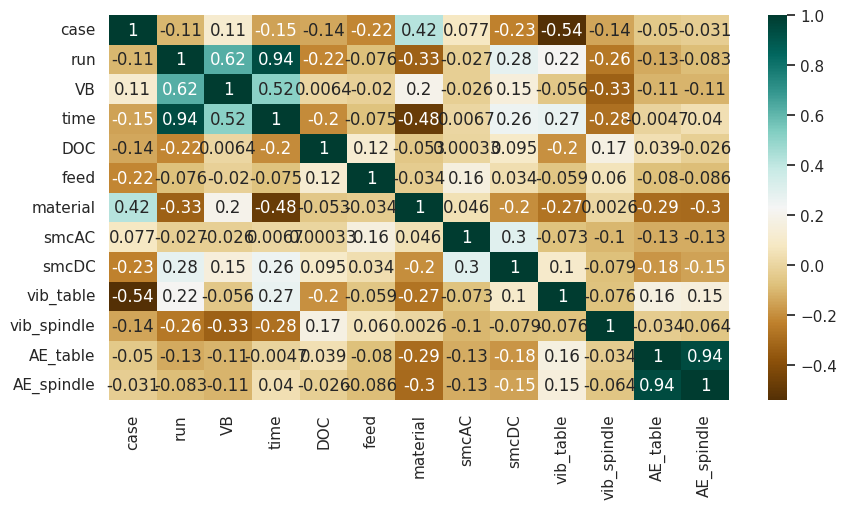

In [ ]:
plt.figure(figsize=(10,5))
c= df_clean.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c



### ✍️
- Does tool wear correlate strongly with vibration? It does correlate, especially spindle vibration, but not strongly.
- Which feature is most predictive? The time of run is most predictive of tool wear
- Are any features redundant? Acoustic Emission of spindle (same correlation as Acoustic Emission of table)

# 🔹 Task 5: Additional Visualization

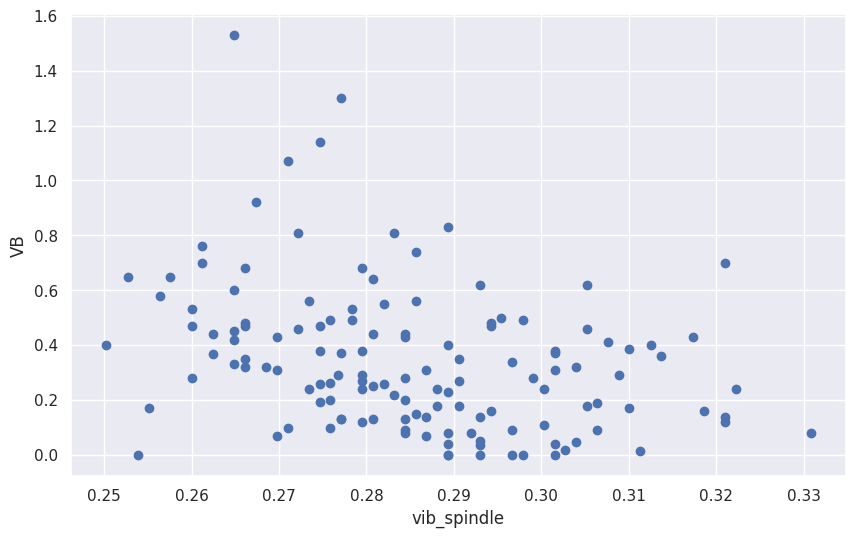

In [ ]:

# Scatter Plot: Example (Tool Wear vs Vibration)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_clean['vib_spindle'],df_clean['VB'])
ax.set_ylabel('VB')
ax.set_xlabel('vib_spindle')
plt.show()

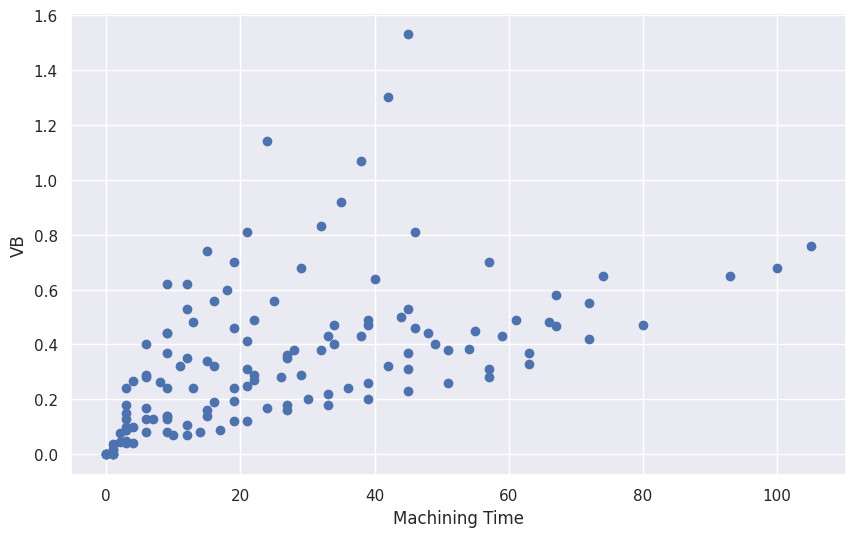

In [ ]:
# Scatter Plot: Example (Tool Wear vs Machining time)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_clean['time'],df_clean['VB'])
ax.set_ylabel('VB')
ax.set_xlabel('Machining Time')
plt.show()


## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?
2. Which sensor signal is most stable?
3. Are there abnormal machining cycles?
4. Can tool wear be predicted from sensor data?
5. If building a Machine Learning model, which features would you select?




Answers
1. The time of the run affects tool wear the most
2. The current measurement of AC current has least outliers. So this signal is most stable
3. Yes; but they were removed as outliers
4. The sensor data doesn't correlate well with tool wear. Hence, it can not be accurately predicted by sensor data
5. Machining time and spindle vibration are good candidates